In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [15]:
names = ['id_num',
        'clump_thickness',
        'uniformity_cell_size',
        'uniformity_cell_shape',
        'marginal_adhesion',
        'epithelial_cell_size',
        'bare_nuclei',
        'bland_chromatin',
        'normal_nucleoli',
        'mitoses',
        'class']
data = pd.read_csv('../Assets/breast-cancer-wisconsin.csv', names=names)
print df.shape
data.head()

(699, 11)


,id_num,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
data['class'] = data['class'].apply(lambda x: 1 if x == 4 else 0)

In [18]:
data['class'].describe()

count    699.000000
mean       0.344778
std        0.475636
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: class, dtype: float64

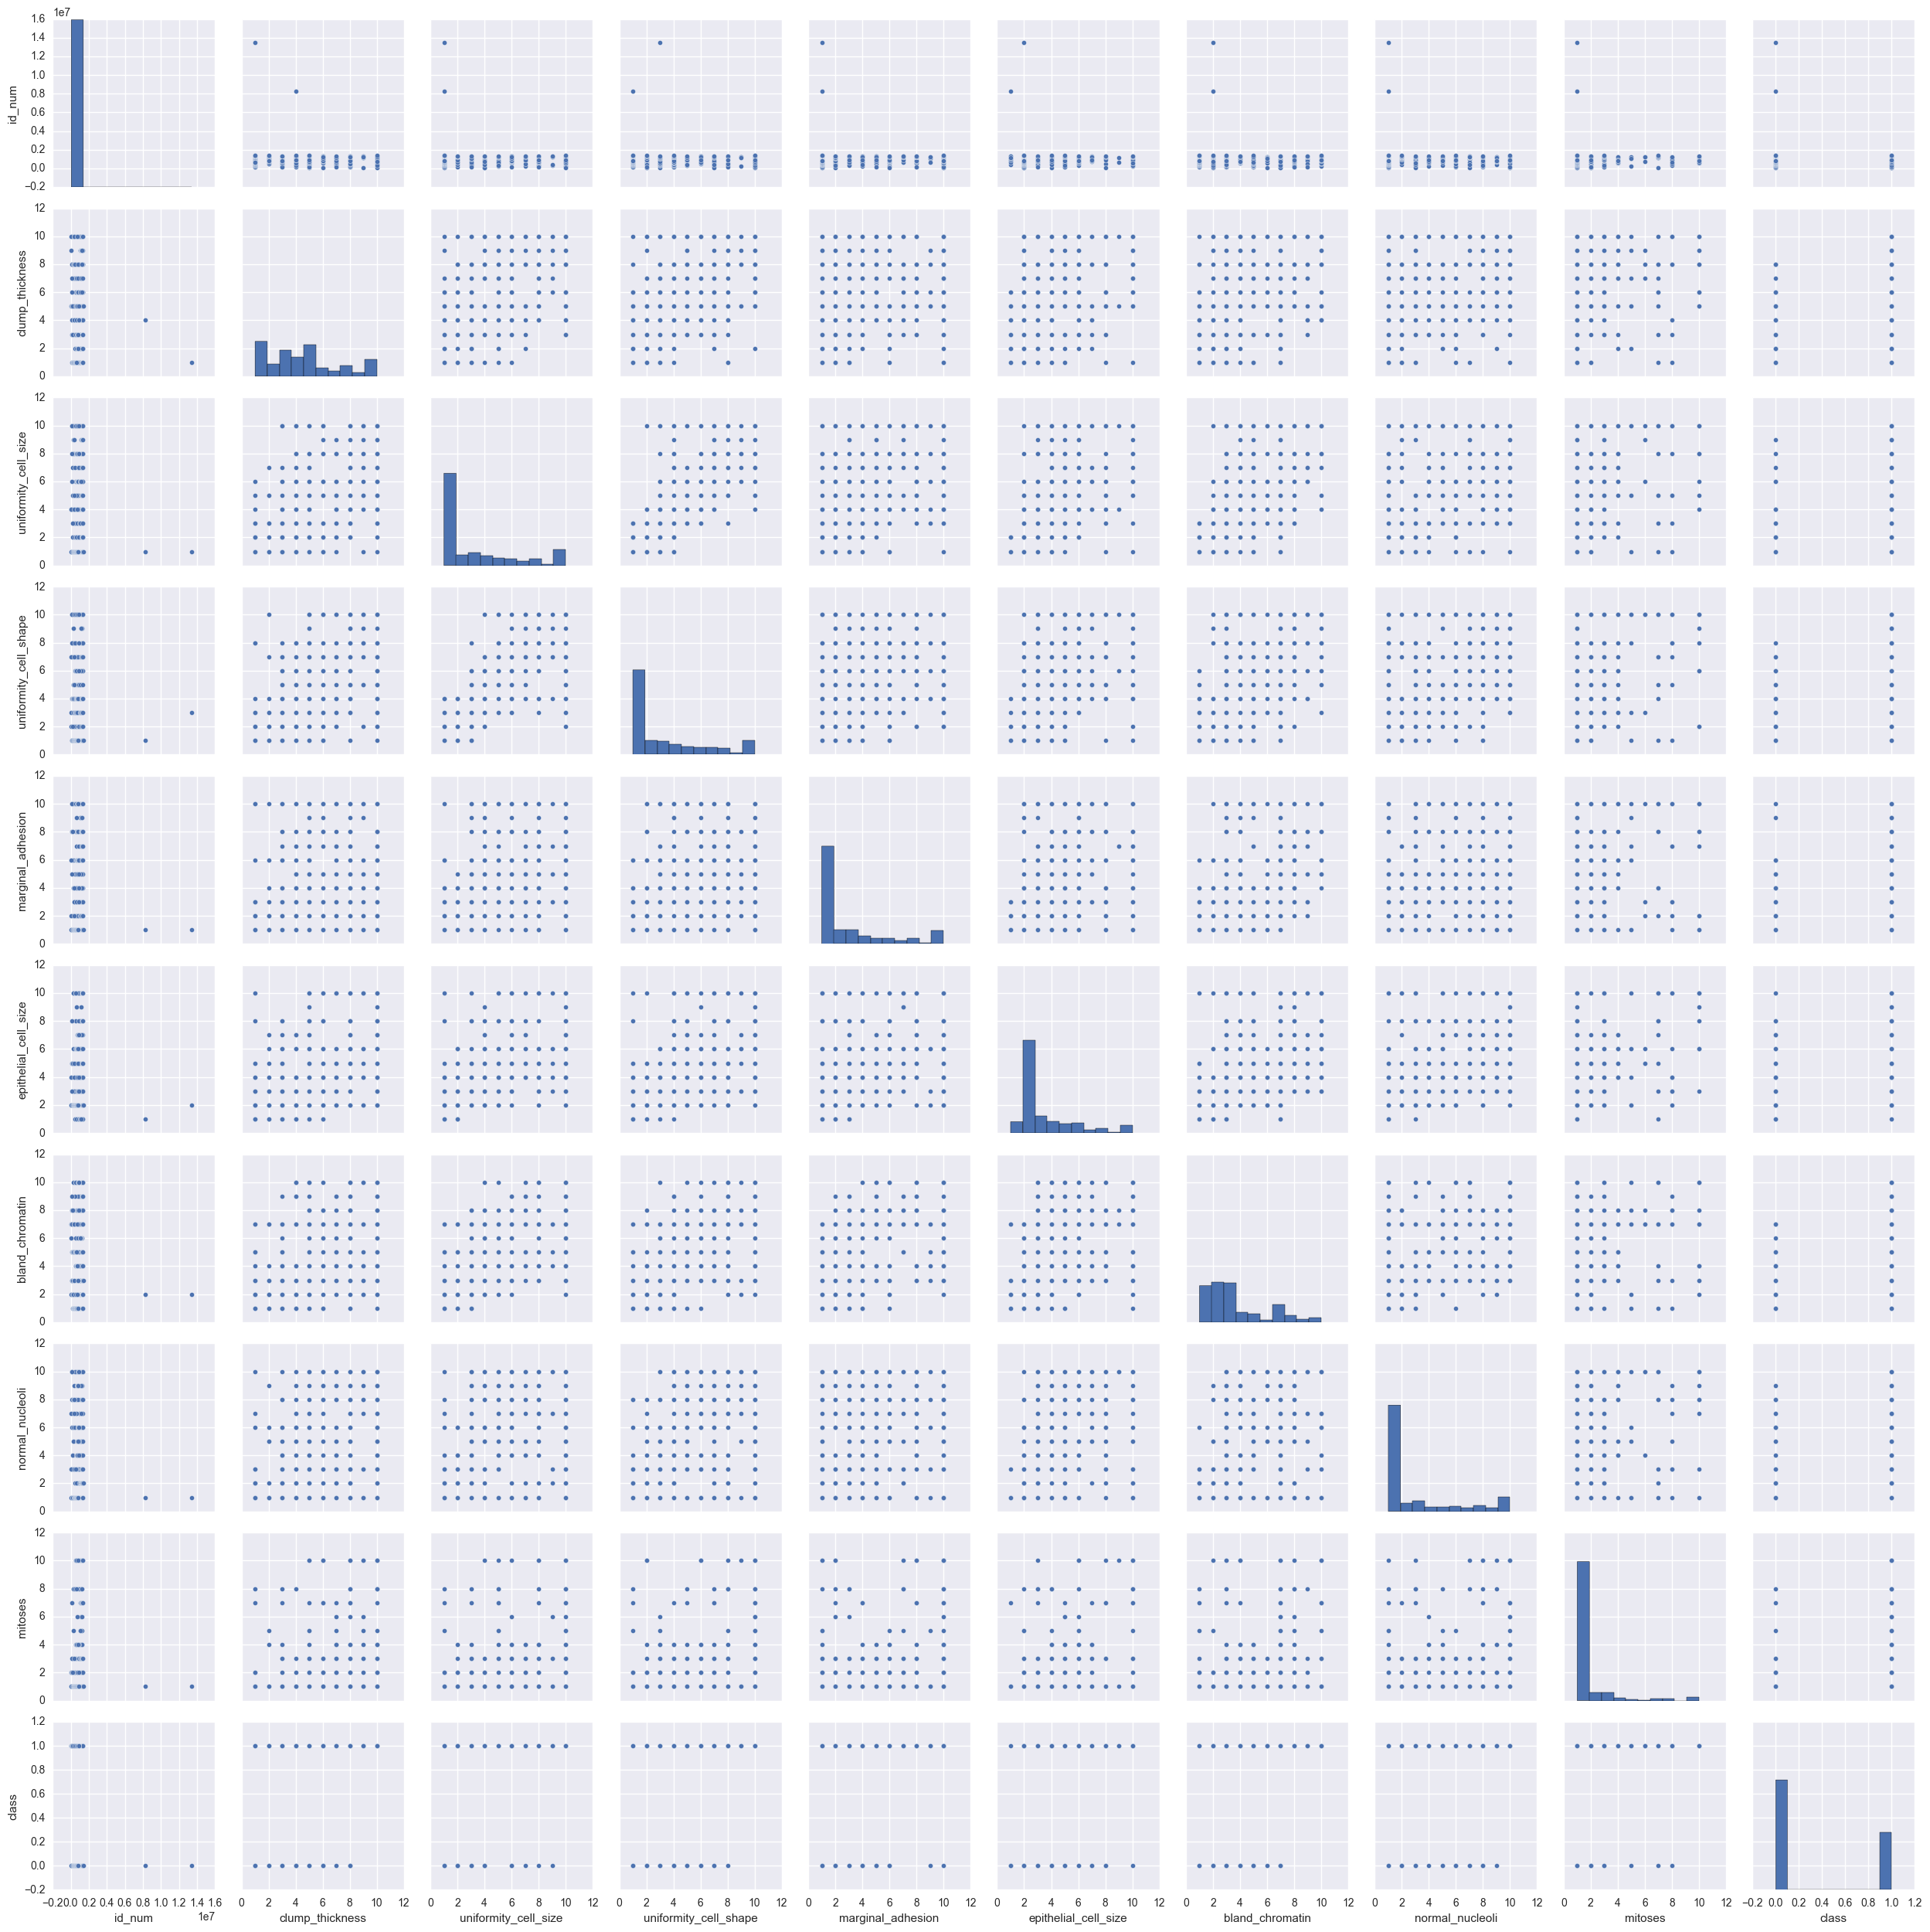

In [19]:
sns.pairplot(data=data)

In [23]:
data.corr().loc[:, 'class']

id_num                  -0.080226
clump_thickness          0.716001
uniformity_cell_size     0.817904
uniformity_cell_shape    0.818934
marginal_adhesion        0.696800
epithelial_cell_size     0.682785
bland_chromatin          0.756616
normal_nucleoli          0.712244
mitoses                  0.423170
class                    1.000000
Name: class, dtype: float64

In [24]:
data[['class', 'uniformity_cell_size', 'uniformity_cell_shape', 'bland_chromatin']].corr()

,class,uniformity_cell_size,uniformity_cell_shape,bland_chromatin
class,1.000000,0.817904,0.818934,0.756616
uniformity_cell_size,0.817904,1.000000,0.906882,0.755721
uniformity_cell_shape,0.818934,0.906882,1.000000,0.735948
bland_chromatin,0.756616,0.755721,0.735948,1.000000


In [28]:
x = data[['uniformity_cell_size', 'uniformity_cell_shape', 'bland_chromatin']]
y = data['class'].reshape(-1, 1)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x, y)

/Users/mwitebsky/anaconda2/envs/lesson01/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
knn.score(x, y)

0.95565092989985689

In [32]:
new_point = [[2,8,2]]

knn.predict(new_point)

array([1])

In [33]:
knn.predict_proba(new_point)

array([[ 0.2,  0.8]])